In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('training_data.csv', names = ['x','y'])

In [ ]:
label = pd.read_csv('training_data_class_labels.csv',names = ['label'])

In [ ]:
df.head()

,x,y
0,-0.235312,1.057181
1,0.812545,-0.551579
2,1.435676,-0.448038
3,1.612300,-0.311149
4,0.336496,0.087980


In [ ]:
label.head(40)

,label
0,0
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,0
9,0


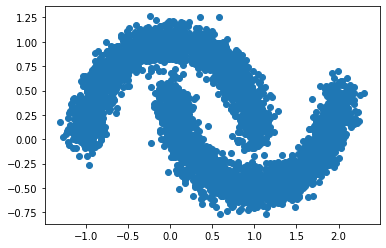

In [ ]:
plt.scatter(df.x, df.y)

In [ ]:
df['label'] = label

In [ ]:
df

,x,y,label
0,-0.235312,1.057181,0
1,0.812545,-0.551579,1
2,1.435676,-0.448038,1
3,1.612300,-0.311149,1
4,0.336496,0.087980,1
...,...,...,...
4495,-0.578848,0.689333,0
4496,-0.084657,1.019098,0
4497,1.897556,-0.094781,1
4498,1.373081,-0.399360,1


In [ ]:
color= ['red' if l == 0 else 'green' for l in df['label']]

In [ ]:
color[:5]

['red', 'green', 'green', 'green', 'green']

# Task 1

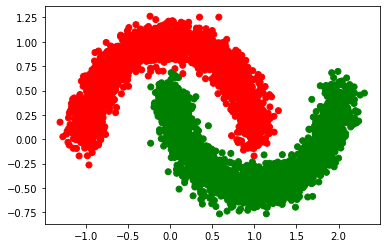

In [ ]:
plt.scatter(df.x, df.y, color= color)
plt.show()

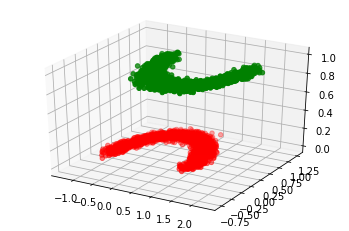

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df.x, df.y, df.label, color = color)

# Task 2

In [ ]:
x = df.drop('label', axis =1)

In [ ]:
x

,x,y
0,-0.235312,1.057181
1,0.812545,-0.551579
2,1.435676,-0.448038
3,1.612300,-0.311149
4,0.336496,0.087980
...,...,...
4495,-0.578848,0.689333
4496,-0.084657,1.019098
4497,1.897556,-0.094781
4498,1.373081,-0.399360


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, label, test_size=0.2, random_state=0)

In [ ]:
X_train

,x,y
3707,1.538343,-0.418136
2601,0.936541,-0.052521
4450,2.037561,0.265160
2552,0.061986,-0.080716
3416,2.184426,0.366460
...,...,...
1033,1.394048,-0.553951
3264,1.061632,0.171772
1653,1.914931,-0.122660
2607,0.541195,-0.120725


## Model

In [ ]:
model = LogisticRegression(random_state=0)


In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [ ]:
model.score(X_train, y_train)

0.8827777777777778

In [ ]:
model.score(X_test, y_test)


0.8744444444444445

In [ ]:
confusion_matrix(y_test, model.predict(X_test))

array([[385,  60],
       [ 53, 402]])

In [ ]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       445
           1       0.87      0.88      0.88       455

    accuracy                           0.87       900
   macro avg       0.87      0.87      0.87       900
weighted avg       0.87      0.87      0.87       900



In [ ]:
parameters = {'solver': ('newton-cg', 'lbfgs', 'sag', 'saga','liblinear')}

In [ ]:
clf = GridSearchCV(model, parameters)

In [ ]:
clf.fit(x, label)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(estimator=LogisticRegression(random_state=0),
             param_grid={'solver': ('newton-cg', 'lbfgs', 'sag', 'saga',
                                    'liblinear')})

In [ ]:
print(classification_report(label, clf.predict(x)))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2250
           1       0.88      0.88      0.88      2250

    accuracy                           0.88      4500
   macro avg       0.88      0.88      0.88      4500
weighted avg       0.88      0.88      0.88      4500



## Naive  bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [ ]:
gnb = GaussianNB()

In [ ]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.8711111111111111

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = neigh.predict(X_train)

In [ ]:
accuracy_score(y_train, y_pred)

0.9994444444444445

In [ ]:
y_pred_test = neigh.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_test)


1.0